In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle
import requests
import json

In [2]:
# Reading the csv file into a pandas DataFrame

csvdata = pd.read_csv('Resources/water_potability.csv')
csvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


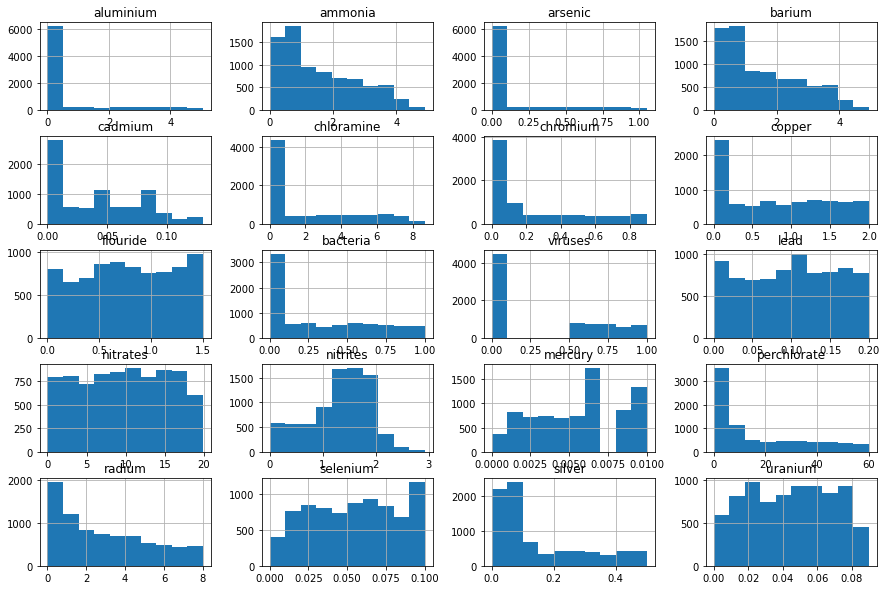

<Figure size 432x288 with 0 Axes>

In [4]:
csvdata.hist(figsize=(15,10))
plt.figure()
plt.show()

In [5]:
# change columns to int64
csvdata = csvdata.astype({"aluminium": "int64"})
csvdata = csvdata.astype({"ammonia": "int64"})
csvdata = csvdata.astype({"barium": "int64"})
csvdata = csvdata.astype({"cadmium": "int64"})
csvdata = csvdata.astype({"chloramine": "int64"})
csvdata = csvdata.astype({"copper": "int64"})
csvdata = csvdata.astype({"flouride": "int64"})
csvdata = csvdata.astype({"bacteria": "int64"})
csvdata = csvdata.astype({"viruses": "int64"})
csvdata = csvdata.astype({"lead": "int64"})
csvdata = csvdata.astype({"nitrates": "int64"})
csvdata = csvdata.astype({"nitrites": "int64"})
csvdata = csvdata.astype({"mercury": "int64"})
csvdata = csvdata.astype({"perchlorate": "int64"})
csvdata = csvdata.astype({"radium": "int64"})
csvdata = csvdata.astype({"selenium": "int64"})
csvdata = csvdata.astype({"silver": "int64"})
csvdata = csvdata.astype({"uranium": "int64"})

In [6]:
csvdata['is_safe'] = csvdata['is_safe'].replace(['1'],'Safe')
csvdata['is_safe'] = csvdata['is_safe'].replace(['0'],'Not Safe')
csvdata.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1,2,0.04,2,0,0,0.83,0,0,0,...,0,16,1,0,37,6,0,0,0,Safe
1,2,3,0.01,3,0,5,0.68,0,0,0,...,0,2,1,0,32,3,0,0,0,Safe
2,1,0,0.04,0,0,4,0.53,0,0,0,...,0,14,1,0,50,7,0,0,0,Not Safe
3,1,3,0.04,2,0,7,0.03,1,1,0,...,0,1,1,0,9,1,0,0,0,Safe
4,0,0,0.03,0,0,2,0.69,0,0,0,...,0,6,1,0,16,2,0,0,0,Safe


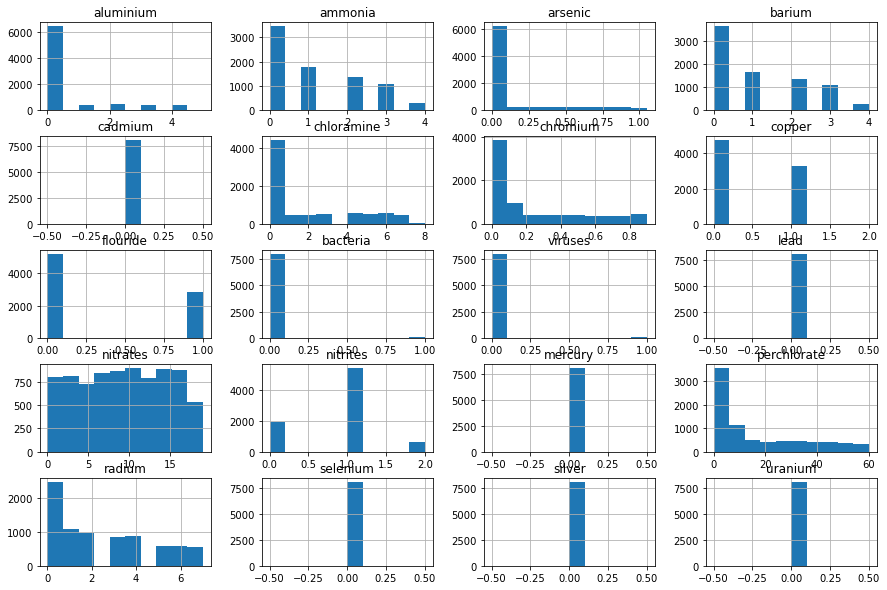

<Figure size 432x288 with 0 Axes>

In [7]:
csvdata.hist(figsize=(15,10))
plt.figure()
plt.show()

<AxesSubplot:>

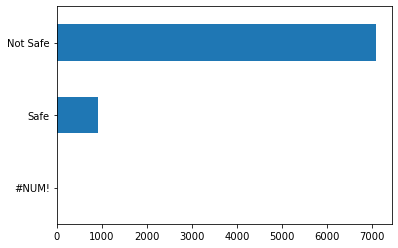

In [8]:
csvdata.is_safe.value_counts().sort_values().plot(kind = 'barh')

In [9]:
# Assign X (data) and y (target)
X = csvdata.drop("is_safe", axis=1)
y = csvdata["is_safe"]
print(X.shape, y.shape)

(7999, 20) (7999,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [12]:
classifier.fit(X_train, y_train)

/Users/chipampe/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [13]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8991498583097183
Testing Data Score: 0.8925


In [14]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:20]}")
print(f"First 10 Actual labels: {y_test[:20].tolist()}")

First 10 Predictions:   ['Not Safe' 'Not Safe' 'Not Safe' 'Not Safe' 'Not Safe' 'Not Safe'
 'Not Safe' 'Not Safe' 'Not Safe' 'Not Safe' 'Not Safe' 'Not Safe'
 'Not Safe' 'Not Safe' 'Not Safe' 'Not Safe' 'Not Safe' 'Not Safe'
 'Not Safe' 'Not Safe']
First 10 Actual labels: ['Not Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Not Safe', 'Not Safe']


In [15]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Not Safe,Not Safe
1,Not Safe,Not Safe
2,Not Safe,Not Safe
3,Not Safe,Not Safe
4,Not Safe,Not Safe
...,...,...
1995,Not Safe,Not Safe
1996,Not Safe,Not Safe
1997,Not Safe,Not Safe
1998,Not Safe,Not Safe


In [16]:
# Save the model as "Waterquality.pkl"

pickle.dump(classifier, open('Waterquality.pkl','wb'))

In [17]:
csvdata.to_csv("waterquality2.csv")